# Predicitng heart disease using machine learning

We are going to take the following approach:
1. Problem defination
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Defination

In a statement,
> Given some clinical parameters about a patient, can we predict whether the patient has heart disease or not ?

## 2. Data

The original data came from the Clevland data from the UCI machine learning. https://archive.ics.uci.edu/ml/datasets/heart+disease

## 3. Evaluation

> If we can reach an accuracy of 95% at predicting whether or not a person has heart disease during the proof of concept,we will pursue the project.

## 4. Features

**Create data dictionery**
* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

## Prepairing the tools
We are going to use pandas,matplotlib,numpy for exploratory data analysis and manipulations.

In [1]:
# Import all the tools we need

# Regular EDA and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from scikit-learn
from sklearn.neighbors import KNeighborsClassifier

# Model evaluation
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# 1. Exploratory Data Analysis

In [2]:
df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Observation:** All the values are non-null

In [4]:
df["thal"].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

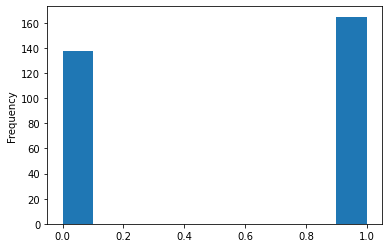

In [5]:
df["target"].plot(kind="hist")

**Observation:** Data is very well balanced

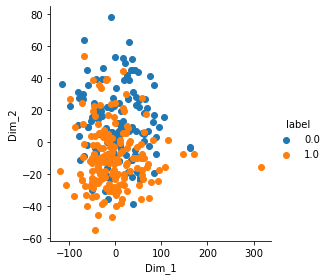

In [12]:
## Visualizing data in 2-D using t-SNE
from sklearn.decomposition import PCA

target = np.array(df["target"])

pca = PCA(n_components=2,random_state=0)
pca_data = pca.fit_transform(df)
pca_data = np.vstack((pca_data.T,target)).T
pca_df = pd.DataFrame(data=pca_data, columns=("Dim_1", "Dim_2", "label"))

    # Ploting the result of tsne
sns.FacetGrid(pca_df, hue="label", height=4).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show();

In [6]:
# Lets split the data into features and class-label
X = df.drop("target",axis=1)
y = df["target"]

In [7]:
# Handling categorical features
# Following are the categorical features: sex,cp,restecg,exang,slope,ca,thal
Xenc = pd.get_dummies(X,columns=['sex','cp','restecg','exang','slope','ca'],drop_first=True)
Xenc.head()

,age,trestbps,chol,fbs,thalach,oldpeak,thal,sex_1,cp_1,cp_2,cp_3,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4
0,63,145,233,1,150,2.3,1,1,0,0,1,0,0,0,0,0,0,0,0,0
1,37,130,250,0,187,3.5,2,1,0,1,0,1,0,0,0,0,0,0,0,0
2,41,130,204,0,172,1.4,2,0,1,0,0,0,0,0,0,1,0,0,0,0
3,56,120,236,0,178,0.8,2,1,1,0,0,1,0,0,0,1,0,0,0,0
4,57,120,354,0,163,0.6,2,0,0,0,0,1,0,1,0,1,0,0,0,0


In [8]:
columns1 = Xenc.columns
print(len(columns1))

20


In [9]:
# Since we will be using KNN-classifier,we need to standardize our data
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_new = scale.fit_transform(Xenc)

In [10]:
X_new.shape

(303, 20)

In [11]:
columns1 = list(columns1)

In [12]:
X_new = pd.DataFrame(X_new,columns=columns1)
X_new.head()

,age,trestbps,chol,fbs,thalach,oldpeak,thal,sex_1,cp_1,cp_2,cp_3,restecg_1,restecg_2,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4
0,0.952197,0.763956,-0.256334,2.394438,0.015443,1.087338,-2.148873,0.681005,-0.444554,-0.634648,3.489114,-1.003306,-0.115663,-0.696631,-0.926766,-0.939142,-0.522599,-0.378677,-0.265841,-0.129532
1,-1.915313,-0.092738,0.072199,-0.417635,1.633471,2.122573,-0.512922,0.681005,-0.444554,1.575677,-0.286606,0.996705,-0.115663,-0.696631,-0.926766,-0.939142,-0.522599,-0.378677,-0.265841,-0.129532
2,-1.474158,-0.092738,-0.816773,-0.417635,0.977514,0.310912,-0.512922,-1.468418,2.249444,-0.634648,-0.286606,-1.003306,-0.115663,-0.696631,-0.926766,1.064802,-0.522599,-0.378677,-0.265841,-0.129532
3,0.180175,-0.663867,-0.198357,-0.417635,1.239897,-0.206705,-0.512922,0.681005,2.249444,-0.634648,-0.286606,0.996705,-0.115663,-0.696631,-0.926766,1.064802,-0.522599,-0.378677,-0.265841,-0.129532
4,0.290464,-0.663867,2.082050,-0.417635,0.583939,-0.379244,-0.512922,-1.468418,-0.444554,-0.634648,-0.286606,0.996705,-0.115663,1.435481,-0.926766,1.064802,-0.522599,-0.378677,-0.265841,-0.129532


# 2.Fitting the model

### Using 5 fold cross validation

optimal value of k is: 10


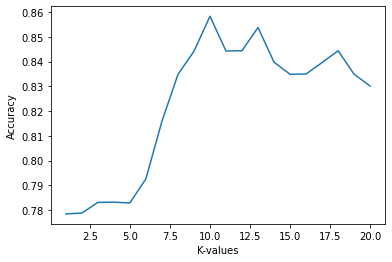

accuracy score for various values of k:[77.84 77.87 78.31 78.32 78.28 79.26 81.58 83.48 84.42 85.84 84.43 84.44
 85.38 83.98 83.49 83.5  83.96 84.44 83.49 83.01]


In [13]:
# Splitting into train and test data
X_new_train,X_new_test,y_train,y_test = train_test_split(X_new,y,test_size=0.3,random_state=0)

# list holding cv scores
cv_score=[]

# performing k-fold cross-validation
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,X_new_train,y_train,cv=5,scoring="accuracy")
    cv_score.append(score.mean())
    
k_values = [x for x in range(1,21)]

# plotting accuracy vs k_values
plt.plot(k_values,cv_score)
plt.xlabel("K-values")
plt.ylabel("Accuracy")

optimal_k = k_values[cv_score.index(max(cv_score))]
print(f"optimal value of k is: {optimal_k}")
plt.show();

cv_score = np.array(cv_score)
cv_score = cv_score*100
print(f"accuracy score for various values of k:{np.round(cv_score,2)}")

#### Training the model with optimal k value

In [14]:
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_new_train,y_train)

# predicting the results
y_pred = knn_optimal.predict(X_new_test)

# Evaluating accuracy
acc = accuracy_score(y_test,y_pred)*100
print(f"Accuracy on the best model is: {acc:.3f}")

Accuracy on the best model is: 81.319


### Using logistic regression with GridSearchCV

In [20]:
# Initialising hyperparameters
params = [{
    'C':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]}]

clf = LogisticRegression(max_iter=1000)
model = GridSearchCV(clf,params,cv=5,scoring="f1")
model.fit(X_new_train,y_train)
print(model.best_estimator_)
print(model.score(X_new_test,y_test))

LogisticRegression(C=0.1, max_iter=1000)
0.8400000000000001


In [24]:
score = model.score(X_new_test,y_test)

In [25]:
print(f"The accuracy on best estimators using logistic regression: {(score*100):.2f}%")

The accuracy on best estimators using logistic regression: 84.00%


In [21]:
clf = LogisticRegression(C=0.1,max_iter=1000)
clf.fit(X_new_train,y_train)
y_pred = clf.predict(X_new_test)

In [23]:
# Evaluating the model
from sklearn.metrics import confusion_matrix,classification_report

cf = confusion_matrix(y_test,y_pred)
print(cf)
print('='*50)
report = classification_report(y_test,y_pred)
print(report)

[[33 11]
 [ 5 42]]
              precision    recall  f1-score   support

           0       0.87      0.75      0.80        44
           1       0.79      0.89      0.84        47

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



## Visualizing data in 2-dim using t-SNE

In [89]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2,random_state=0,perplexity=25,n_iter=3000)
tsne = model.fit_transform(X_new_train,y_train)

In [90]:
print(tsne.shape,y_train.shape)

(212, 2) (212,)


In [91]:
y_train1 = np.array(y_train)
y_train2 = y_train1.reshape(212,1)

In [92]:
y_train2.shape

(212, 1)

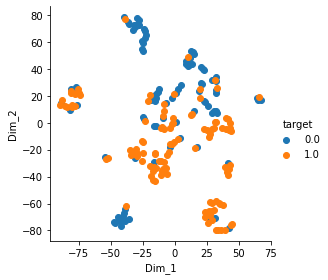

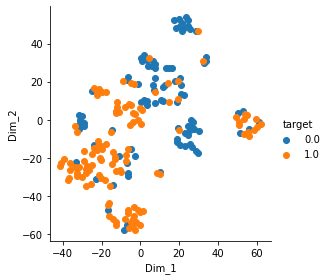

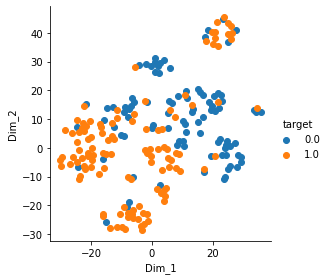

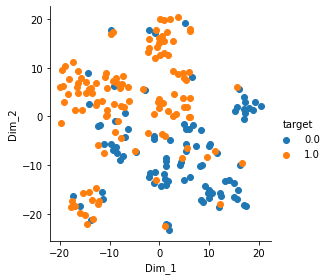

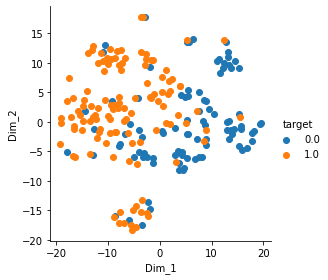

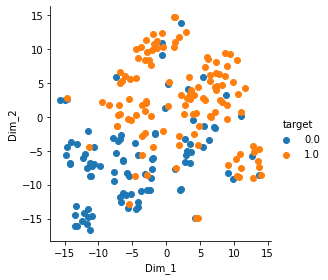

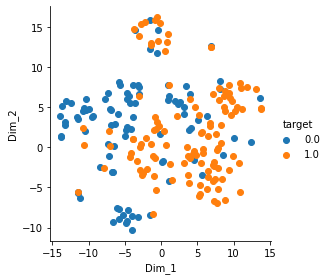

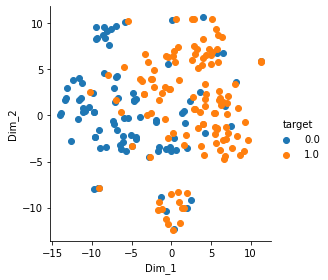

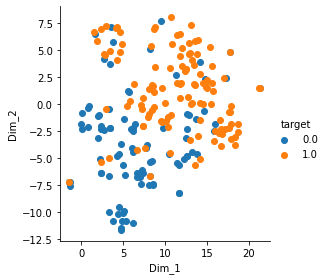

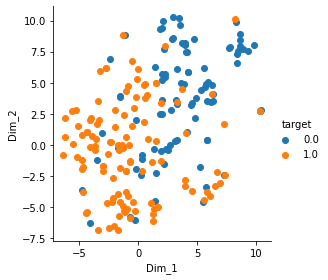

In [95]:

for i in range(5,51,5):
    model = TSNE(n_components=2,random_state=0,perplexity=i,n_iter=3000)
    tsne = model.fit_transform(X_new_train,y_train)
    data1 = np.hstack((tsne,y_train2))
    tsne_df = pd.DataFrame(data=data1,columns=['Dim_1','Dim_2','target'])
    sns.FacetGrid(tsne_df, hue="target", height=4).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
    plt.show();

As can be seen from the above plots, plots are changing for different values of perplexity so it is not a well defined distribution.